In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
import mds
import xarray as xr
import xmitgcm
import seaborn as sns
import cmocean
import sys
import os
from IPython import display
import time
import xesmf as xe


In [2]:
import xgcm

In [3]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (14,6)})


In [4]:
dir_llc270 = '/central/groups/oceanphysics/anirban/llc270_2008_2009/grid'
ds_grid = xmitgcm.open_mdsdataset(dir_llc270,iters=None,geometry='llc',default_dtype='>f4')

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009/grid. Using default version.
  "in %s. Using default version." % data_dir)


In [5]:
ds_grid

<xarray.Dataset>
Dimensions:  (face: 13, i: 270, i_g: 270, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    YC       (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    XG

In [6]:
dir_llc270 = '/central/groups/oceanphysics/anirban/llc270_2008_2009'
ds_llc270 =  xmitgcm.open_mdsdataset(dir_llc270,iters='all',geometry='llc',default_dtype='>f4')

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/an

In [7]:
ds_llc270

<xarray.Dataset>
Dimensions:   (face: 13, i: 270, i_g: 270, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 24)
Coordinates:
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    iter      (time) int64 dask.array<shape=(24,), chunksize=(1,)>
  * time      (time) int64 423000 425088 427320 429480 ... 469008 471168 473400
    XC        (face, j,

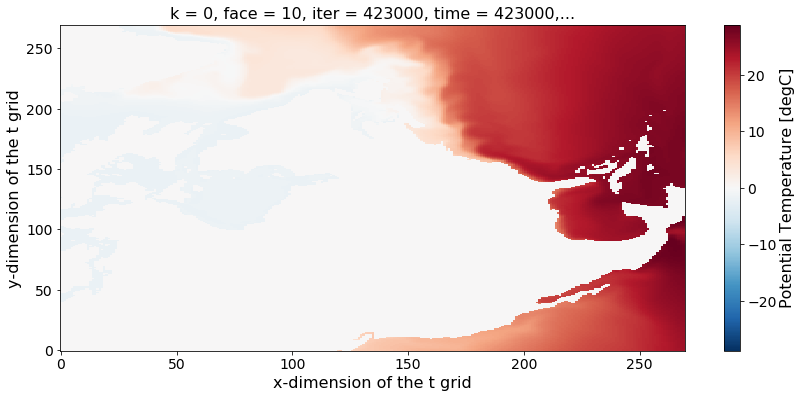

In [8]:
ds_llc270.sel(face=10).isel(time=0,k=0).THETA.plot()

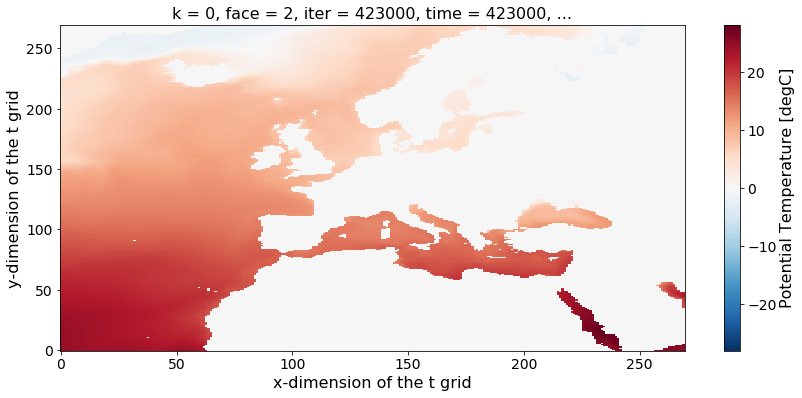

In [9]:
ds_llc270.sel(face=2).isel(time=0,k=0).THETA.plot()

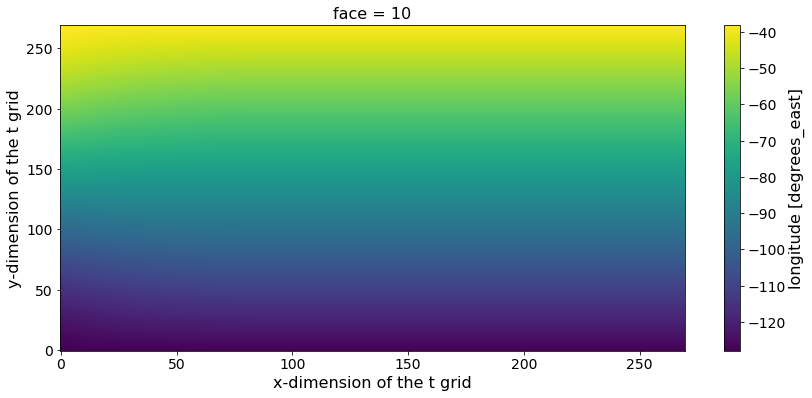

In [15]:
ds_llc270.sel(face=10).XC.plot()

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)


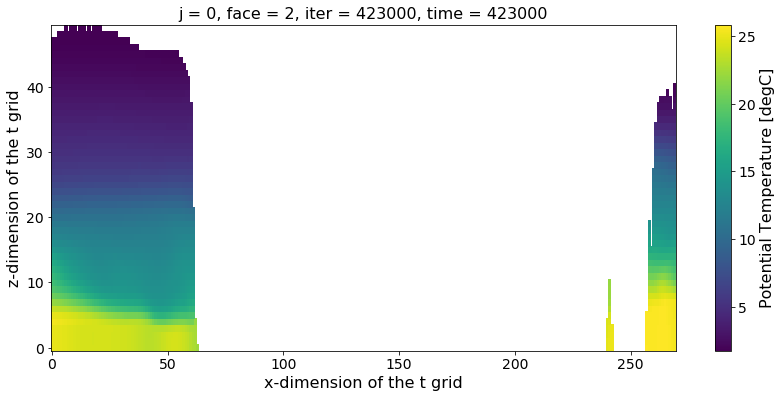

In [10]:
ds_llc270.where(ds_llc270.hFacC).sel(face=2).isel(time=0,j=0).THETA.plot()

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)


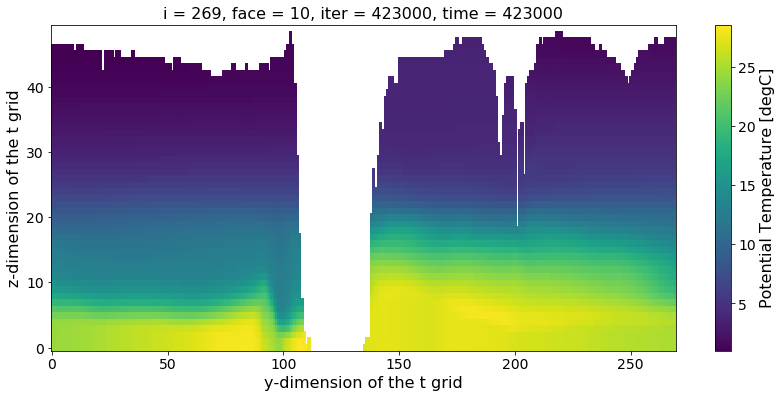

In [11]:
ds_llc270.where(ds_llc270.hFacC).sel(face=10).isel(time=0,i=-1).THETA.plot()

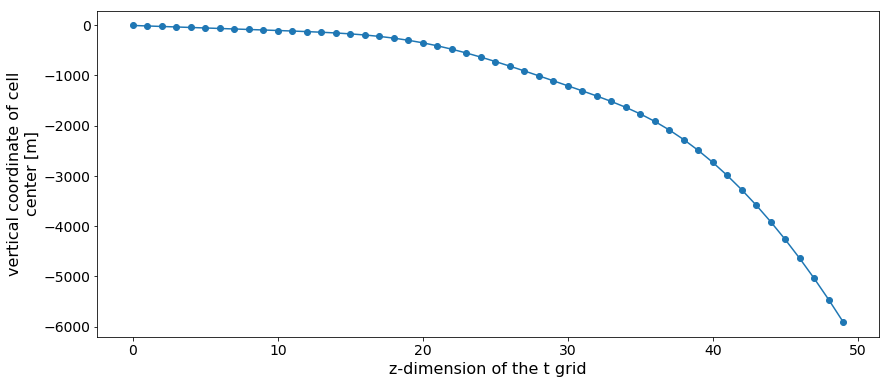

In [17]:
ds_llc270.Z.plot(marker='o')

In [8]:
XCfull = np.zeros((270,540))
XCfull[:,0:270] = np.rot90(ds_llc270.XC.sel(face=10).values)
XCfull[:,270:540] = ds_llc270.XC.sel(face=2).values

YCfull = np.zeros((270,540))
YCfull[:,0:270] = np.rot90(ds_llc270.YC.sel(face=10).values)
YCfull[:,270:540] = ds_llc270.YC.sel(face=2).values

XGfull = np.zeros((270,540))
XGfull[:,0:270] = np.rot90(ds_llc270.XG.sel(face=10).values)
XGfull[:,270:540] = ds_llc270.XG.sel(face=2).values

YGfull = np.zeros((270,540))
YGfull[:,0:270] = np.rot90(ds_llc270.YG.sel(face=10).values)
YGfull[:,270:540] = ds_llc270.YG.sel(face=2).values


In [9]:
fold = open('/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/delYFile', 'rb')
delYold1815 = np.fromfile(fold, '>f4')
delYold1815.shape

(532,)

In [10]:
idy = (np.where((YGfull[:,-2]>=26.855293273925781) & (YGfull[:,-2]<np.sum(delYold1815)+ 26.855293273925781))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]
idx = (np.where((XGfull[2,:]>=-81.583335876464844) & (XGfull[2,:]<-81.583335876464844+0.041666666666667*1820))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]
xc = XCsmall[idy]
yc = YCsmall[:,idx]
xg = XGsmall[idy]
yg = YGsmall[:,idx]
xc.shape, yc.shape, xg.shape, yg.shape

((67, 227), (67, 227), (67, 227), (67, 227))

In [11]:
xc.min()

-81.16666412353516

In [12]:
xc.max()

-5.833333492279053

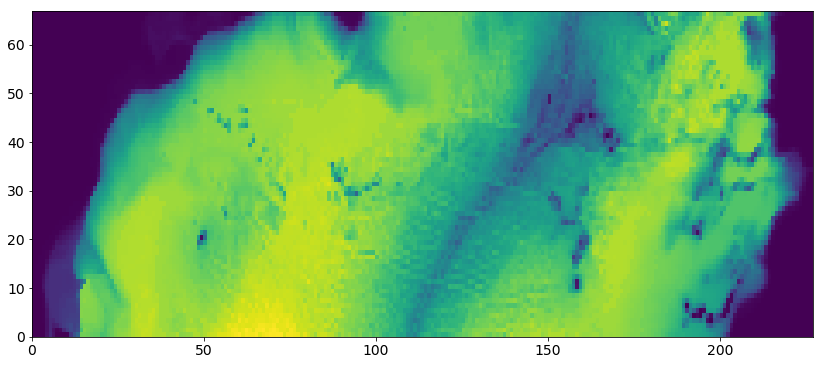

In [16]:
depthfull = np.zeros((270,540))
depthfull[:,0:270] = np.rot90(ds_llc270.Depth.sel(face=10).values)
depthfull[:,270:540] = ds_llc270.Depth.sel(face=2).values
depth = depthfull[idy,:][:,idx]
plt.pcolormesh(depth)

In [17]:
z = ds_llc270.Z.values

In [32]:
z

array([-5.000000e+00, -1.500000e+01, -2.500000e+01, -3.500000e+01,
       -4.500000e+01, -5.500000e+01, -6.500000e+01, -7.500500e+01,
       -8.502500e+01, -9.509500e+01, -1.053100e+02, -1.158700e+02,
       -1.271500e+02, -1.397400e+02, -1.544700e+02, -1.724000e+02,
       -1.947350e+02, -2.227100e+02, -2.574700e+02, -2.999300e+02,
       -3.506800e+02, -4.099300e+02, -4.774700e+02, -5.527100e+02,
       -6.347350e+02, -7.224000e+02, -8.144700e+02, -9.097400e+02,
       -1.007155e+03, -1.105905e+03, -1.205535e+03, -1.306205e+03,
       -1.409150e+03, -1.517095e+03, -1.634175e+03, -1.765135e+03,
       -1.914150e+03, -2.084035e+03, -2.276225e+03, -2.491250e+03,
       -2.729250e+03, -2.990250e+03, -3.274250e+03, -3.581250e+03,
       -3.911250e+03, -4.264250e+03, -4.640250e+03, -5.039250e+03,
       -5.461250e+03, -5.906250e+03], dtype=float32)

In [18]:
time = ds_llc270.time.values

In [19]:
time

array([423000, 425088, 427320, 429480, 431712, 433872, 436104, 438336,
       440496, 442728, 444888, 447120, 449352, 451368, 453600, 455760,
       457992, 460152, 462384, 464616, 466776, 469008, 471168, 473400])

In [22]:
Saltfull = np.ma.zeros((50,270,540))

Saltfull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).isel(time=0).SALT.sel(face=10).values, 1, (1,2))
Saltfull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).isel(time=0).SALT.sel(face=2).values

Salt = Saltfull[:,idy][:,:,idx]

Thetafull = np.ma.zeros((50,270,540))

Thetafull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).isel(time=0).THETA.sel(face=10).values, 1, (1,2))
Thetafull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).isel(time=0).THETA.sel(face=2).values

Theta = Thetafull[:,idy][:,:,idx]


/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  

In [23]:
ds_sal = xr.DataArray(Salt, coords={'Z': z,'YC': yc.mean(axis=1), 'XC': xc.mean(axis=0),},
             dims=['Z', 'YC','XC']).to_dataset(name='Salt')
ds_theta = xr.DataArray(Theta, coords={'Z': z,'YC': yc.mean(axis=1), 'XC': xc.mean(axis=0),},
             dims=['Z', 'YC','XC']).to_dataset(name='Theta')
ds_new = xr.merge([ds_sal,ds_theta])

In [24]:
ds_new

<xarray.Dataset>
Dimensions:  (XC: 227, YC: 67, Z: 50)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
  * YC       (YC) float64 27.06 27.33 27.6 27.88 ... 42.85 43.08 43.3 43.53
  * XC       (XC) float64 -81.17 -80.83 -80.5 -80.17 ... -6.5 -6.167 -5.833
Data variables:
    Salt     (Z, YC, XC) float64 nan nan nan nan 36.02 ... nan nan nan nan nan
    Theta    (Z, YC, XC) float64 nan nan nan nan 24.95 ... nan nan nan nan nan

In [25]:
Saltfull = np.ma.zeros((24,50,270,540))

Saltfull[:,:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).SALT.sel(face=10).values, 1, (2,3))
Saltfull[:,:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).SALT.sel(face=2).values

Salt = Saltfull[:,:,idy][:,:,:,idx]

Thetafull = np.ma.zeros((24,50,270,540))

Thetafull[:,:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).THETA.sel(face=10).values, 1, (2,3))
Thetafull[:,:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).THETA.sel(face=2).values

Theta = Thetafull[:,:,idy][:,:,:,idx]


/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  

In [46]:
ds_sal = xr.DataArray(Salt, coords={'time': time,'Z': z,'lat': yc.mean(axis=1), 'lon': xc.mean(axis=0),},
             dims=['time', 'Z', 'lat','lon']).to_dataset(name='Salt')
ds_theta = xr.DataArray(Theta, coords={'time': time,'Z': z,'lat': yc.mean(axis=1), 'lon': xc.mean(axis=0),},
             dims=['time', 'Z', 'lat','lon']).to_dataset(name='Theta')
ds_new = xr.merge([ds_sal,ds_theta])

In [47]:
ds_new

<xarray.Dataset>
Dimensions:  (Z: 50, lat: 67, lon: 227, time: 24)
Coordinates:
  * time     (time) int64 423000 425088 427320 429480 ... 469008 471168 473400
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
  * lat      (lat) float64 27.06 27.33 27.6 27.88 ... 42.85 43.08 43.3 43.53
  * lon      (lon) float64 -81.17 -80.83 -80.5 -80.17 ... -6.5 -6.167 -5.833
Data variables:
    Salt     (time, Z, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    Theta    (time, Z, lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [56]:
ddir0 = '/central/groups/oceanphysics/anirban/NA/experiments/run_ll910_test_tides/'
ds_2 = xmitgcm.open_mdsdataset(ddir0,iters=None,default_dtype='>f4')

In [57]:
ds_2

<xarray.Dataset>
Dimensions:  (XC: 910, XG: 910, YC: 266, YG: 266, Z: 100, Zl: 100, Zp1: 101, Zu: 100)
Coordinates:
  * XC       (XC) >f4 -81.54167 -81.458336 -81.375 ... -5.8750024 -5.7916694
  * YC       (YC) >f4 26.889458 26.95777 27.02604 ... 43.38593 43.44224
  * XG       (XG) >f4 -81.583336 -81.5 -81.41667 ... -5.9166694 -5.833336
  * YG       (YG) >f4 26.855293 26.923624 26.991915 ... 43.35776 43.414097
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * Zp1      (Zp1) >f4 0.0 -5.0 -10.0 -15.0 ... -5678.0 -5903.38 -6134.5
  * Zu       (Zu) >f4 -5.0 -10.0 -15.0 -20.0 ... -5678.0 -5903.38 -6134.5
  * Zl       (Zl) >f4 0.0 -5.0 -10.0 -15.0 ... -5244.5 -5458.37 -5678.0 -5903.38
    rA       (YC, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    dxG      (YG, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    dyG      (YC, XG) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    Depth    (YC, XC) >f4 dask.array<shape=(266, 910

In [83]:
ds_sal

<xarray.Dataset>
Dimensions:  (Z: 50, lat: 67, lon: 227, time: 24)
Coordinates:
  * time     (time) int64 423000 425088 427320 429480 ... 469008 471168 473400
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
  * lat      (lat) float64 27.06 27.33 27.6 27.88 ... 42.85 43.08 43.3 43.53
  * lon      (lon) float64 -81.17 -80.83 -80.5 -80.17 ... -6.5 -6.167 -5.833
Data variables:
    Salt     (time, Z, lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [84]:
ds_fine = xr.Dataset({'time': (['time'], ds_new.time.values),
                      'Z': (['Z'], ds_2.Z.values),
    'lat': (['lat'], ds_2.YC.values),
    'lon': (['lon'], ds_2.XC.values)})
ds_fine

<xarray.Dataset>
Dimensions:  (Z: 100, lat: 266, lon: 910, time: 24)
Coordinates:
  * time     (time) int64 423000 425088 427320 429480 ... 469008 471168 473400
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * lat      (lat) >f4 26.889458 26.95777 27.02604 ... 43.38593 43.44224
  * lon      (lon) >f4 -81.54167 -81.458336 -81.375 ... -5.8750024 -5.7916694
Data variables:
    *empty*

In [85]:
regridder = xe.Regridder(ds_sal, ds_fine, 'bilinear')
regridder

Overwrite existing file: bilinear_67x227_266x910.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_67x227_266x910.nc 
Reuse pre-computed weights? False 
Input grid shape:           (67, 227) 
Output grid shape:          (266, 910) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [86]:
salt_fine = regridder(ds_sal['Salt'])
salt_fine

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


<xarray.DataArray 'Salt' (time: 24, Z: 50, lat: 266, lon: 910)>
array([[[[0., ..., 0.],
         ...,
         [0., ..., 0.]],

        ...,

        [[0., ..., 0.],
         ...,
         [0., ..., 0.]]],


       ...,


       [[[0., ..., 0.],
         ...,
         [0., ..., 0.]],

        ...,

        [[0., ..., 0.],
         ...,
         [0., ..., 0.]]]])
Coordinates:
  * lon      (lon) >f4 -81.54167 -81.458336 -81.375 ... -5.8750024 -5.7916694
  * lat      (lat) >f4 26.889458 26.95777 27.02604 ... 43.38593 43.44224
  * time     (time) int64 423000 425088 427320 429480 ... 469008 471168 473400
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
Attributes:
    regrid_method:  bilinear

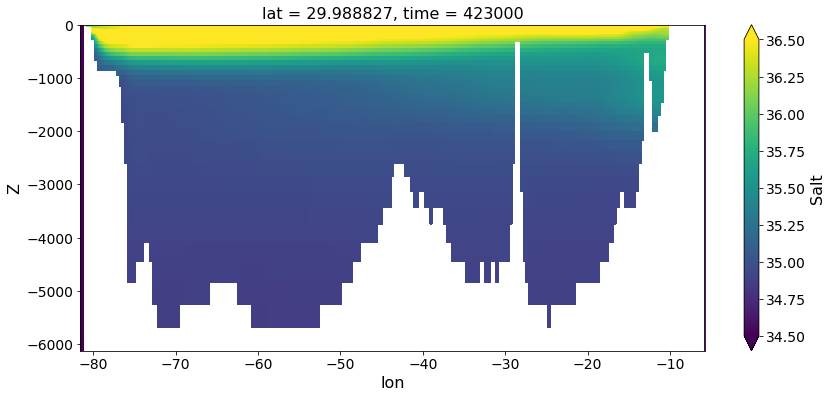

In [81]:
salt_fine.isel(time=0).sel(lat=30,method='nearest').plot(vmin=34.5,vmax=36.5)

In [82]:
salt_fine.shape

(24, 50, 266, 910)

In [74]:
ds_2.YC.values

array([26.889458, 26.95777 , 27.02604 , 27.094269, 27.162458, 27.230606,
       27.298714, 27.36678 , 27.434805, 27.502789, 27.570732, 27.638634,
       27.706493, 27.774313, 27.84209 , 27.909826, 27.97752 , 28.045174,
       28.112785, 28.180355, 28.247885, 28.315372, 28.382816, 28.450218,
       28.51758 , 28.5849  , 28.652176, 28.719412, 28.786606, 28.853756,
       28.920864, 28.98793 , 29.054955, 29.121937, 29.188877, 29.255774,
       29.322628, 29.389439, 29.45621 , 29.522938, 29.58962 , 29.656261,
       29.72286 , 29.789417, 29.855928, 29.922398, 29.988827, 30.05521 ,
       30.121552, 30.187847, 30.254103, 30.320314, 30.386482, 30.452606,
       30.518688, 30.584728, 30.650723, 30.716673, 30.782581, 30.848446,
       30.914265, 30.980042, 31.045776, 31.111465, 31.177113, 31.242714,
       31.308271, 31.373787, 31.439257, 31.504684, 31.570066, 31.635405,
       31.700699, 31.76595 , 31.831154, 31.896317, 31.961433, 32.02651 ,
       32.091537, 32.15652 , 32.221462, 32.286358, 

In [72]:
ds_new.Salt.lat

<xarray.DataArray 'lat' (lat: 67)>
array([27.060165, 27.332756, 27.604692, 27.875969, 28.146582, 28.416529,
       28.685804, 28.954409, 29.222336, 29.489584, 29.756149, 30.022028,
       30.28722 , 30.55172 , 30.815523, 31.078632, 31.34104 , 31.602747,
       31.863747, 32.124039, 32.383625, 32.642494, 32.90065 , 33.158089,
       33.41481 , 33.670807, 33.926083, 34.18063 , 34.434452, 34.687542,
       34.939903, 35.191532, 35.442425, 35.692581, 35.941998, 36.190674,
       36.43861 , 36.685806, 36.932255, 37.177956, 37.422913, 37.667122,
       37.910583, 38.15329 , 38.395248, 38.636456, 38.876904, 39.116604,
       39.355545, 39.593731, 39.831158, 40.067829, 40.303741, 40.538895,
       40.773289, 41.006924, 41.239796, 41.471909, 41.703259, 41.933849,
       42.163677, 42.392742, 42.621044, 42.848583, 43.075363, 43.301376,
       43.526627])
Coordinates:
  * lat      (lat) float64 27.06 27.33 27.6 27.88 ... 42.85 43.08 43.3 43.53

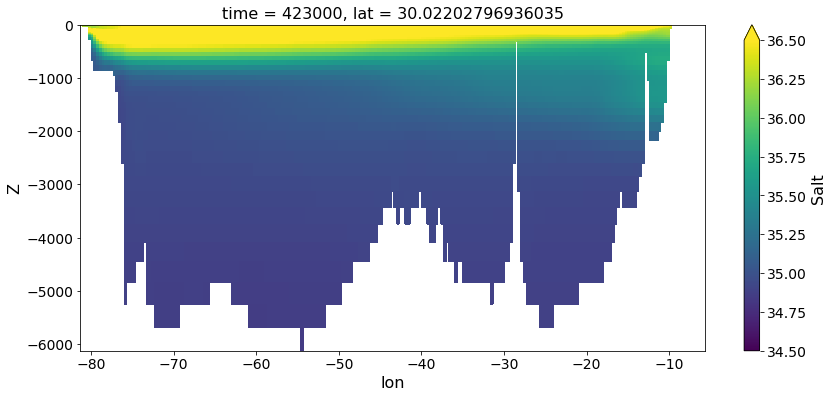

In [80]:
ds_new.Salt.isel(time=0).sel(lat=30,method='nearest').plot(vmin=34.5,vmax=36.5)

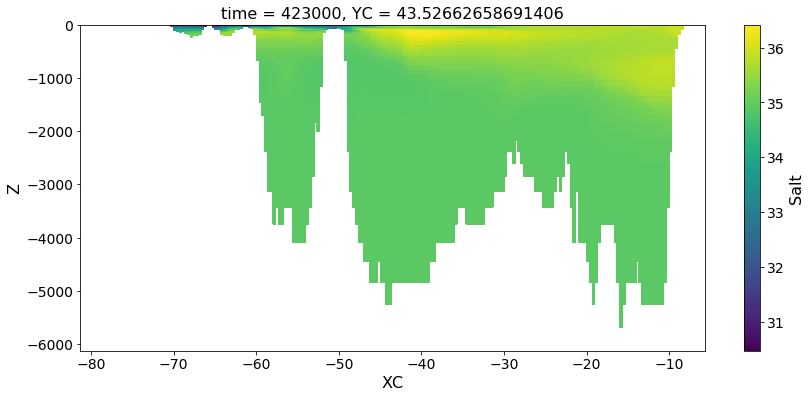

In [82]:
ds_new.Salt.isel(time=0,YC=-1).plot()

In [115]:
Saltfull = np.zeros((24,50,270,540))

Saltfull[:,:,:,0:270] =  np.rot90(ds_llc270.SALT.sel(face=10).values, 1, (2,3))
Saltfull[:,:,:,270:540] =  ds_llc270.SALT.sel(face=2).values

Salt = Saltfull[:,:,idy][:,:,:,idx]

Thetafull = np.zeros((24,50,270,540))

Thetafull[:,:,:,0:270] =  np.rot90(ds_llc270.THETA.sel(face=10).values, 1, (2,3))
Thetafull[:,:,:,270:540] =  ds_llc270.THETA.sel(face=2).values

Theta = Thetafull[:,:,idy][:,:,:,idx]

maskfull = np.ma.zeros((50,270,540))

maskfull[:,:,0:270] =  np.rot90(ds_llc270.hFacC.sel(face=10).values, 1, (1,2))
maskfull[:,:,270:540] =  ds_llc270.hFacC.sel(face=2).values

landmask = maskfull[:,idy][:,:,idx]


In [92]:
ds_sal = xr.DataArray(Salt, coords={'time': time,'Z': z,'lat': yc.mean(axis=1), 'lon': xc.mean(axis=0),},
             dims=['time', 'Z', 'lat','lon']).to_dataset(name='Salt')
ds_theta = xr.DataArray(Theta, coords={'time': time,'Z': z,'lat': yc.mean(axis=1), 'lon': xc.mean(axis=0),},
             dims=['time', 'Z', 'lat','lon']).to_dataset(name='Theta')
ds_new = xr.merge([ds_sal,ds_theta])

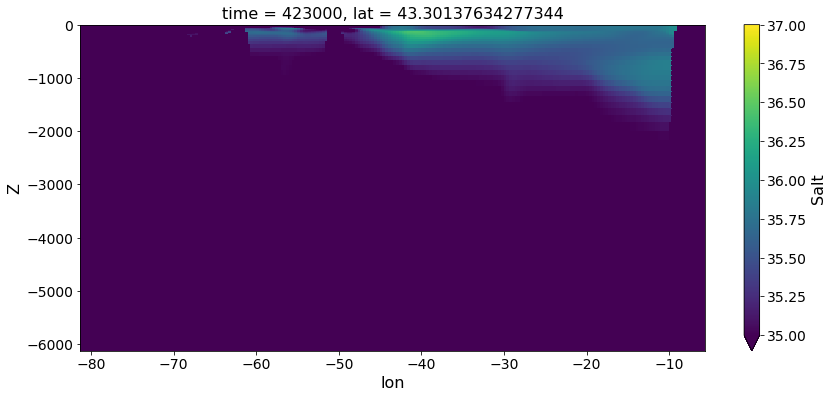

In [95]:
ds_new.Salt.isel(time=0,lat=-2).plot(vmin=35, vmax=37)

In [98]:
x = ds_new.lon.values
z = ds_new.Z.values
Salt_N = ds_new.Salt.isel(time=0,lat=-2).values
Salt_S = ds_new.Salt.isel(time=0,lat=2).values


In [100]:
x.shape, z.shape, Salt_N.shape, Salt_S.shape

((227,), (50,), (50, 227), (50, 227))

In [99]:
from scipy import interpolate


In [105]:
fN = interpolate.interp2d(x,z, Salt_N, kind='cubic')
fS = interpolate.interp2d(x,z, Salt_S, kind='cubic')

In [106]:
x_fine = ds_2.XC
z_fine = ds_2.Z

In [107]:
Salt_N_fine = fN(x_fine, z_fine)
Salt_S_fine = fS(x_fine, z_fine)


In [149]:
f_landN = interpolate.interp2d(x,z, landmask[:,-2], kind='cubic')
land_N_fine = f_landN(x_fine, z_fine)

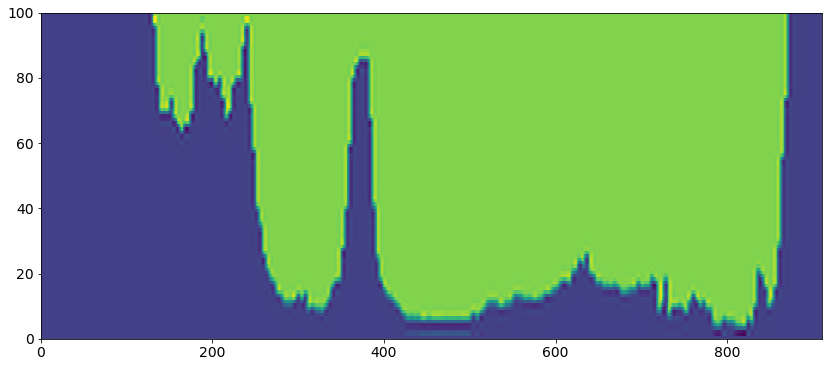

In [150]:
plt.pcolormesh(land_N_fine)

In [109]:
Salt_N_fine.shape

(100, 910)

In [ ]:
ds_llc270.hFacC

In [126]:
landmask.shape

(50, 67, 227)

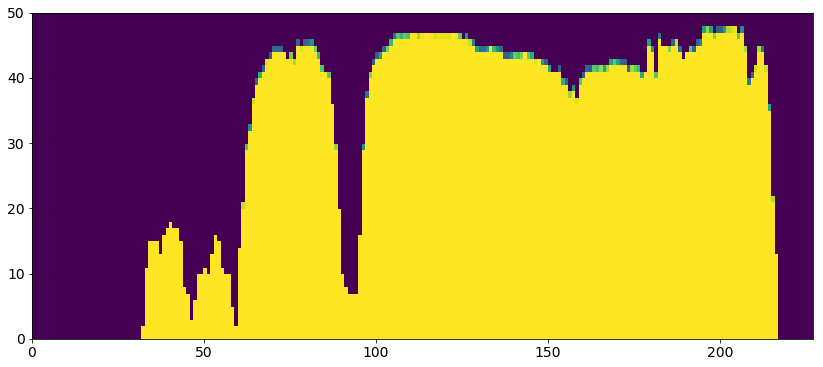

In [148]:
plt.pcolormesh(landmask[:,-2])

In [131]:
landmask_f_ds = ds_2.hFacC.values

In [132]:
landmask_f_ds.shape

(100, 266, 910)

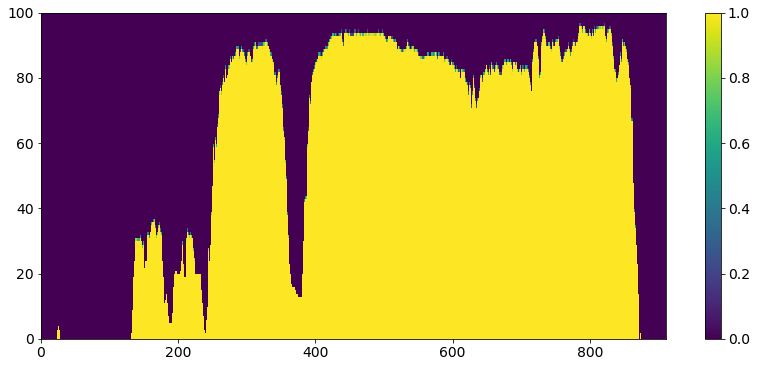

In [138]:
plt.pcolormesh(landmask_f_ds[:,-2,:]);
plt.colorbar()

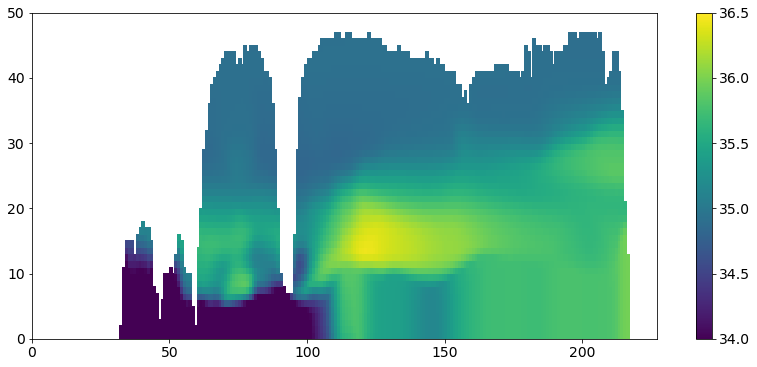

In [143]:
Salt_N_masked = np.ma.masked_where(landmask[:,-2]!=1, Salt_N)
plt.pcolormesh(Salt_N_masked, vmin=34, vmax=36.5)
plt.colorbar()

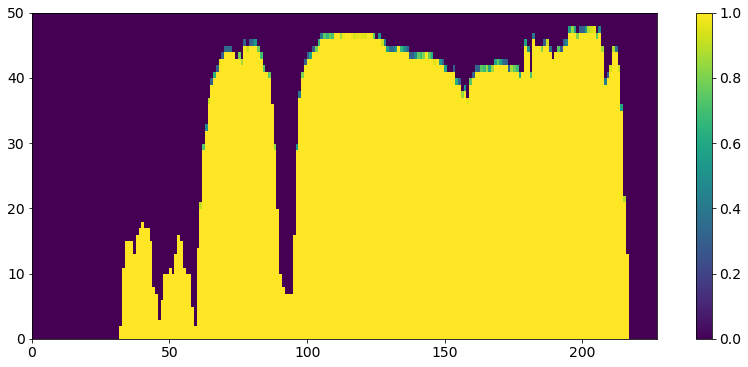

In [125]:
plt.pcolormesh(landmask[:,-2]);plt.colorbar()


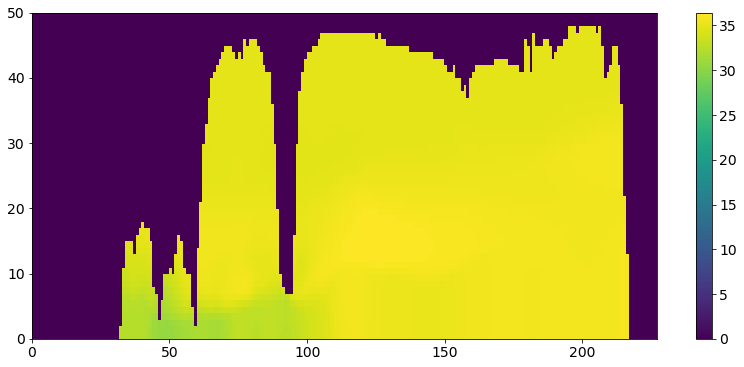

In [112]:
plt.pcolormesh(Salt_N);
plt.colorbar()

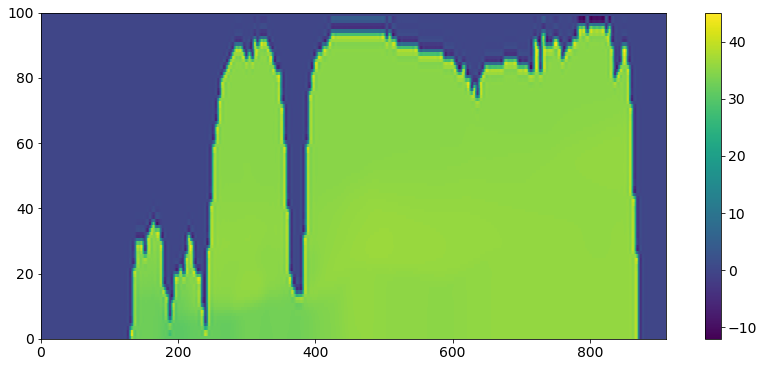

In [134]:
plt.pcolormesh(np.flipud(Salt_N_fine));
plt.colorbar()

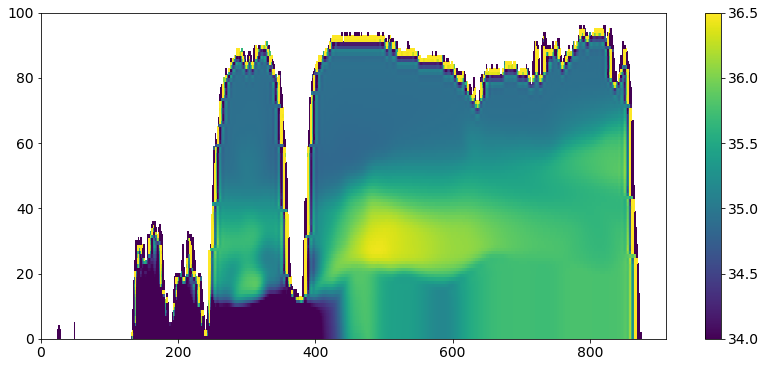

In [147]:
Salt_N_fine_masked = np.ma.masked_where(landmask_f_ds[:,-2]!=1, np.flipud(Salt_N_fine))
plt.pcolormesh(Salt_N_fine_masked, vmin=34, vmax=36.5);
plt.colorbar()

In [157]:
fN = interpolate.interp2d(x,z, Salt_N, kind='linear')
fS = interpolate.interp2d(x,z, Salt_S, kind='linear')

x_fine = ds_2.XC
z_fine = ds_2.Z

Salt_N_fine = fN(x_fine, z_fine)
Salt_S_fine = fS(x_fine, z_fine)


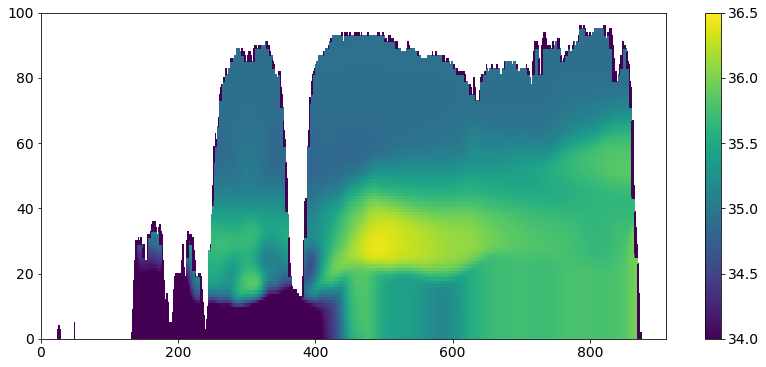

In [158]:
Salt_N_fine_masked = np.ma.masked_where(landmask_f_ds[:,-2]!=1, np.flipud(Salt_N_fine))
plt.pcolormesh(Salt_N_fine_masked, vmin=34, vmax=36.5);
plt.colorbar()

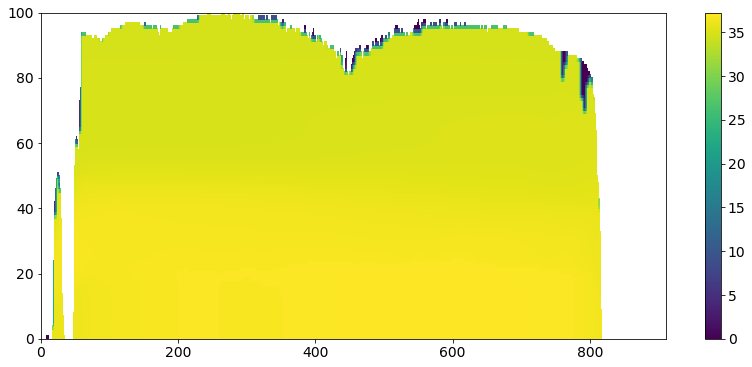

In [162]:
Salt_S_fine_masked = np.ma.masked_where(landmask_f_ds[:,2]!=1, np.flipud(Salt_S_fine))
plt.pcolormesh(Salt_S_fine_masked)#, vmin=35, vmax=37.5);
plt.colorbar()

In [178]:
Salt_S_fine_masked.shape

(100, 910)

In [169]:
ds_S_surf_old = ds_new.Salt.isel(time=0,Z=0).to_dataset(name='Salt')
ds_S_fine = xr.Dataset({'lat': (['lat'], ds_2.YC.values), 'lon': (['lon'], ds_2.XC.values)})
ds_S_fine

<xarray.Dataset>
Dimensions:  (lat: 266, lon: 910)
Coordinates:
  * lat      (lat) >f4 26.889458 26.95777 27.02604 ... 43.38593 43.44224
  * lon      (lon) >f4 -81.54167 -81.458336 -81.375 ... -5.8750024 -5.7916694
Data variables:
    *empty*

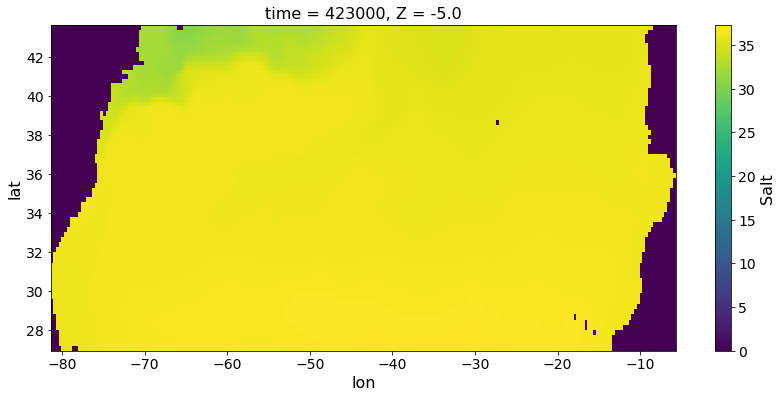

In [170]:
ds_S_surf_old.Salt.plot()

In [171]:
regridder = xe.Regridder(ds_S_surf_old, ds_S_fine, 'bilinear')
regridder

Overwrite existing file: bilinear_67x227_266x910.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_67x227_266x910.nc 
Reuse pre-computed weights? False 
Input grid shape:           (67, 227) 
Output grid shape:          (266, 910) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [172]:
salt_fine = regridder(ds_S_surf_old.Salt)
salt_fine

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


<xarray.DataArray 'Salt' (lat: 266, lon: 910)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) >f4 -81.54167 -81.458336 -81.375 ... -5.8750024 -5.7916694
  * lat      (lat) >f4 26.889458 26.95777 27.02604 ... 43.38593 43.44224
Attributes:
    regrid_method:  bilinear

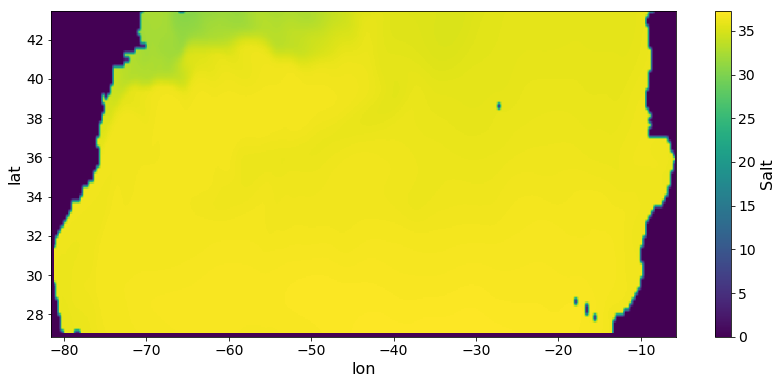

In [174]:
salt_fine.plot()

In [175]:
Salt_surf = ds_new.Salt.isel(time=0,Z=0).values
X = ds_new.lon
Y = ds_new.lat

f_Surf = interpolate.interp2d(X,Y, Salt_surf, kind='linear')


In [176]:
x_fine = ds_2.XC
y_fine = ds_2.YC

In [177]:
salt_fine.shape

(266, 910)

In [181]:
Salt_fine_2 = f_Surf(x_fine,y_fine)

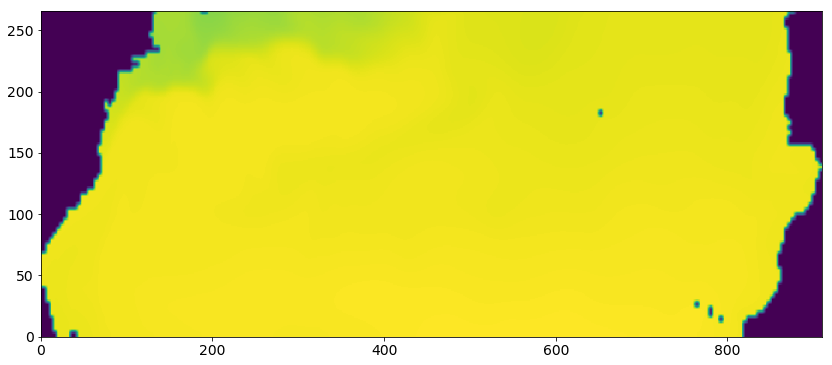

In [182]:
plt.pcolormesh(Salt_fine_2)

In [185]:
Salt_fine_2.shape

(266, 910)

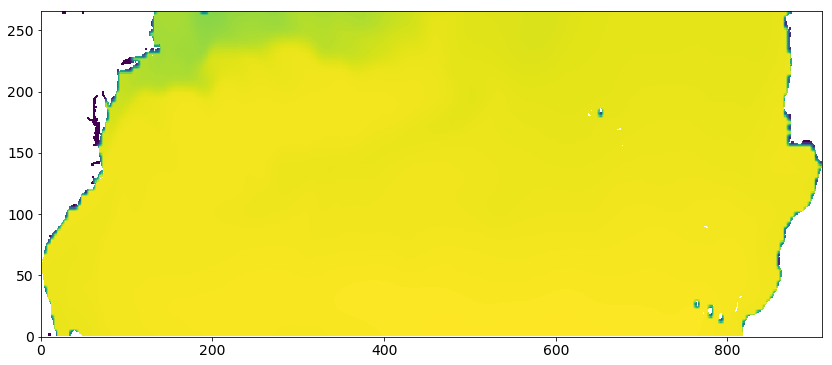

In [187]:
Salt_fine_2_masked = np.ma.masked_where(landmask_f_ds[0]!=1, Salt_fine_2)
plt.pcolormesh(Salt_fine_2_masked)